# Transport 

In [483]:
#Import libraries
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb
import calendar
import plotly.express as px

In [484]:
from PIL import Image

(-0.5, 465.5, 406.5, -0.5)

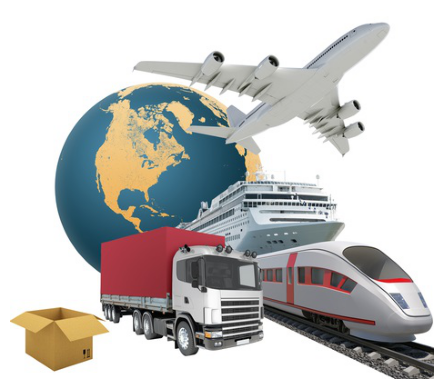

In [485]:
imagen= mpimg.imread('Transport.jpg')
plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [486]:
#Import DataBases

IRL= pd.read_csv("Plublic Transport Ireland.csv")
IRLuas= pd.read_csv("TOA11 - Luas Passenger Numbers Ireland.csv")
IRLFM=pd.read_csv("Trail Trafict Ireland.csv")

#Additional Countries
NRWW = pd.read_excel("NORWAY.xlsx")
NZL= pd.read_csv("PT005 - Public transport boardings by mode New Zealand.csv")

#Population
PI=pd.read_csv("PP Ireland.csv")
PN=pd.read_excel("PP Norway.xlsx")
PNZ=pd.read_excel("PP NZ.xlsx")

# Structure of dataframe

In [487]:
#First Database
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [488]:
IRL.info

<bound method DataFrame.info of      STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
...        ...                 ...       ...           ...           ...   
1019  THA25C01  Passenger Journeys   2023W43  2023 Week 43            40   
1020  THA25C01  Passenger Journeys   2023W44  2023 Week 44            10   
1021  THA25C01  Passenger Journeys   2023W44  2023 Week 44            20   
1022  THA25C01  Passenger Journeys   2023W44  2023 Week 44            30   
1023  THA25C01  Passenger Journeys   2023W44  2023 Week 44            40   

                         Mode of Transport    UNIT     

In [489]:
IRL.describe()

,C03935V04687,VALUE
count,1024.000000,9.600000e+02
mean,25.000000,1.740812e+06
std,11.185803,1.423490e+06
min,10.000000,2.323100e+04
25%,17.500000,6.121042e+05
50%,25.000000,9.495040e+05
75%,32.500000,2.982254e+06
max,40.000000,5.488658e+06


In [490]:
IRL.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

#  Checking for Missing Values and Inputing Them

In [491]:
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [492]:
IRL.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [493]:
IRL.fillna(0, inplace=True)
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [494]:
IRL.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

In [495]:
print(IRL['Mode of Transport'].head())

0                        Dublin Metro Bus
1             Bus, excluding Dublin Metro
2                                    Rail
3    All public transport, excluding LUAS
4                        Dublin Metro Bus
Name: Mode of Transport, dtype: object


In [496]:
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [497]:
IRL= IRL[IRL['Mode of Transport'] != 'All public transport, excluding LUAS']
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0


In [498]:
print(IRL['Mode of Transport'].head())

0               Dublin Metro Bus
1    Bus, excluding Dublin Metro
2                           Rail
4               Dublin Metro Bus
5    Bus, excluding Dublin Metro
Name: Mode of Transport, dtype: object


# Group by Year

In [499]:
IRL['Year'] = IRL['Week'].str.slice(0, 4)  # to get the first 4 characters (year)
IRL['Week_Number'] = IRL['Week'].str.slice(-2)  # Last 2 characters (week number)
IRL['Week_Number'] = IRL['Week_Number'].astype(int)  # Convert to integer type
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0,2019,1
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0,2019,1
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0,2019,2
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2


In [500]:
IRL['Week'] = IRL['Year'].astype(str) + ' ' + IRL['Week_Number'].astype(str)
IRL['Date'] = pd.to_datetime(IRL['Week'] + ' 0', format='%Y %U %w')
IRL['Month'] = IRL['Date'].dt.month.apply(lambda x: calendar.month_name[x])
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number,Date,Month
0,THA25C01,Passenger Journeys,2019W01,2019 1,10,Dublin Metro Bus,Number,1987891.0,2019,1,2019-01-06,January
1,THA25C01,Passenger Journeys,2019W01,2019 1,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1,2019-01-06,January
2,THA25C01,Passenger Journeys,2019W01,2019 1,30,Rail,Number,0.0,2019,1,2019-01-06,January
4,THA25C01,Passenger Journeys,2019W02,2019 2,10,Dublin Metro Bus,Number,2709579.0,2019,2,2019-01-13,January
5,THA25C01,Passenger Journeys,2019W02,2019 2,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2,2019-01-13,January


In [501]:
IRL_Total = IRL.groupby(['Year','Mode of Transport', 'Month']).agg({'VALUE': 'sum'}).reset_index()
IRL_Total.head()

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0


# Second database 

In [502]:
IRLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [503]:
print(IRLuas['Statistic Label'].head())

0    Red line
1    Red line
2    Red line
3    Red line
4    Red line
Name: Statistic Label, dtype: object


In [504]:
IRL_2 = IRLuas[['Statistic Label','Year','Month','VALUE']]

In [505]:
IRL_2=IRL_2[IRL_2["Year"].astype("int64")>=2019]
IRL_2.head()

,Statistic Label,Year,Month,VALUE
13,Red line,2019,January,1747263
14,Red line,2019,February,1846358
15,Red line,2019,March,2052087
16,Red line,2019,April,1916485
17,Red line,2019,May,1992879


In [506]:
IRL_T= IRL_2[IRL_2['Statistic Label'] == 'All Luas lines']

In [507]:
IRL_T= IRL_T[IRL_T['Month'] != 'All months']

In [508]:
IRL_T=IRL_T.rename (columns= {'Statistic Label':'Mode of Transport'})
IRL_T.head()

,Mode of Transport,Year,Month,VALUE
143,All Luas lines,2019,January,3658484
144,All Luas lines,2019,February,3727609
145,All Luas lines,2019,March,4069124
146,All Luas lines,2019,April,3826763
147,All Luas lines,2019,May,4003472


# Concatenate 2 dataframes

In [509]:
Ireland = pd.concat([IRL_Total, IRL_T], ignore_index=True)
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
217,2022,All Luas lines,August,3292231.0
218,2022,All Luas lines,September,3811093.0
219,2022,All Luas lines,October,4219124.0
220,2022,All Luas lines,November,4375705.0


In [510]:
Ireland.isnull()

,Year,Mode of Transport,Month,VALUE
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
217,False,False,False,False
218,False,False,False,False
219,False,False,False,False
220,False,False,False,False


In [511]:
Ireland.isnull().sum()

Year                 0
Mode of Transport    0
Month                0
VALUE                0
dtype: int64

In [512]:
Transport_M = Ireland['Mode of Transport'].value_counts()
Transport_M

Bus, excluding Dublin Metro    58
Dublin Metro Bus               58
Rail                           58
All Luas lines                 48
Name: Mode of Transport, dtype: int64

In [513]:
mapping = {
    'All Luas lines': 'Luas',
    'Bus, excluding Dublin Metro':'Bus',
    'Dublin Metro Bus': 'Metro Bus',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [514]:
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,Bus,April,2681041.0
1,2019,Bus,August,2684969.0
2,2019,Bus,December,3633236.0
3,2019,Bus,February,2783538.0
4,2019,Bus,January,2485599.0
...,...,...,...,...
217,2022,Luas,August,3292231.0
218,2022,Luas,September,3811093.0
219,2022,Luas,October,4219124.0
220,2022,Luas,November,4375705.0


In [515]:
def Quarter(month):
    if month in ['January', 'February', 'March']:
        return 'K1'
    elif month in ['April','May', 'June']:
        return 'K2'
    elif month in ['July', 'August','September']:
        return 'K3'
    elif month in ['October', 'November', 'December']:
        return 'K4'
Ireland['Quarter'] = Ireland['Month'].apply(Quarter)
Ireland

,Year,Mode of Transport,Month,VALUE,Quarter
0,2019,Bus,April,2681041.0,K2
1,2019,Bus,August,2684969.0,K3
2,2019,Bus,December,3633236.0,K4
3,2019,Bus,February,2783538.0,K1
4,2019,Bus,January,2485599.0,K1
...,...,...,...,...,...
217,2022,Luas,August,3292231.0,K3
218,2022,Luas,September,3811093.0,K3
219,2022,Luas,October,4219124.0,K4
220,2022,Luas,November,4375705.0,K4


In [516]:
Ireland = Ireland.groupby(['Year', 'Mode of Transport', 'Quarter'])['VALUE'].sum().reset_index()

In [517]:
Ireland['VALUE'] = (Ireland['VALUE'] / 1000).round(2)
Ireland

,Year,Mode of Transport,Quarter,VALUE
0,2019,Luas,K1,11455.22
1,2019,Luas,K2,11580.96
2,2019,Luas,K3,12078.81
3,2019,Luas,K4,13232.25
4,2020,Luas,K1,9520.41
...,...,...,...,...
71,2023,Metro Bus,K4,17265.58
72,2023,Rail,K1,10114.46
73,2023,Rail,K2,11277.19
74,2023,Rail,K3,11102.10


In [518]:
Ireland['Year'] = Ireland['Year'].astype(int)
Ireland['VALUE'] = Ireland['VALUE'].astype(int)

# Transports used in Ireland from 2019 to 2023 (First country)

Text(0, 0.5, 'Value in thousands')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '2023')])

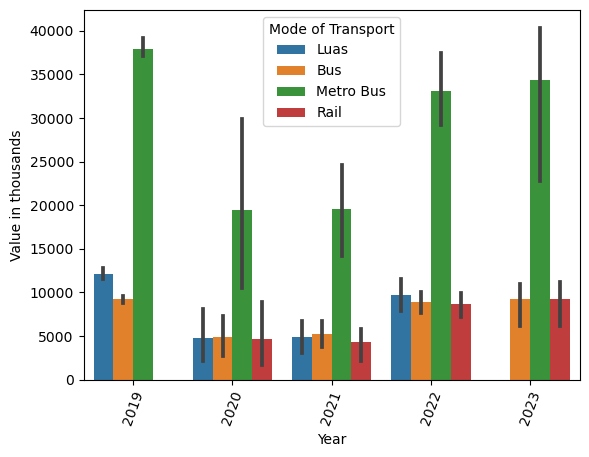

In [519]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Ireland)

plt.ylabel('Value in thousands')

plt.xticks(rotation=70)

# Evolution of transport use in Ireland 

In [520]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [521]:
fig = px.bar(Ireland, x='Year', y='VALUE', color='Mode of Transport', 
             animation_frame='Quarter', 
             title='Evolution of transport use in Ireland')

fig.show()

# Data set for better integration with data from the 2 additional countries 

In [522]:
Ireland['Country'] = 'Ireland'

In [523]:
mapping = {
    'Luas': 'Tram and suburban railway',
    'Metro Bus':'Bus',
    'Rail': 'Tram and suburban railway',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [524]:
Ireland.head()

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland


# Second country: Norway 

In [525]:
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
0,Passengers (1 000 passengers),All modes of transportation,Total,185208,166243,154021,189817,147832,78412,104742,...,105964,119821,147908,143175,156600,149507,176612,187085,173702,162879
1,Passengers (1 000 passengers),All modes of transportation,Commercial routs,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,Passengers (1 000 passengers),Bus (Scheduled road transport),Total,111127,97337,89841,115613,91551,49575,65728,...,71174,75073,93229,91748,96026,90117,109149,117465,106997,98617
4,Passengers (1 000 passengers),Bus (Scheduled road transport),Commercial routs,2161,2140,2314,2152,2084,352,1096,...,368,942,1076,962,1432,1730,1347,1090,1400,1457


In [526]:
NRWW= NRWW[NRWW['Type of route'] == 'Public-funded routes']
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
5,Passengers (1 000 passengers),Bus (Scheduled road transport),Public-funded routes,108967,95197,87527,113461,89467,49224,64632,...,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Passengers (1 000 passengers),Boat,Public-funded routes,1990,2528,2730,2124,1570,1235,1852,...,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Passengers (1 000 passengers),Tram and suburban railway,Public-funded routes,50904,45116,42323,50136,36986,20261,27133,...,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549
14,Passengers (1 000 passengers),Railway,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [527]:
NRWW.drop(['Contents', 'Type of route'], axis=1, inplace=True)

In [528]:
NRWW_1=NRWW.drop([2, 14])

In [529]:
NRWW_1.head()

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus (Scheduled road transport),108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Boat,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [530]:
mapping = {
    'Bus (Scheduled road transport)': 'Bus',
    'Boat':'Maritime transportation '}

NRWW_1['Mode of Transport'] = NRWW_1['Mode of Transport'].replace(mapping)

In [531]:
NRWW_1.head()

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus,108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Maritime transportation,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [532]:
NRWW_3= NRWW_1.melt(var_name="Year",value_name="VALUE")
NRWW_3.head()

,Year,VALUE
0,Mode of Transport,Bus
1,Mode of Transport,Maritime transportation
2,Mode of Transport,Tram and suburban railway
3,2019K1,108967
4,2019K1,1990


In [533]:
sequence = ['Bus', 'Maritime transportation', 'Tram and suburban railway']
seq_length = len(sequence)

NRWW_3['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NRWW_3))]

NRWW_3.head()

,Year,VALUE,Mode of Transport
0,Mode of Transport,Bus,Bus
1,Mode of Transport,Maritime transportation,Maritime transportation
2,Mode of Transport,Tram and suburban railway,Tram and suburban railway
3,2019K1,108967,Bus
4,2019K1,1990,Maritime transportation


In [534]:
NRWW_3 = NRWW_3.drop([0, 1, 2])

In [535]:
NRWW_3[['Year', 'Quarter']] = NRWW_3['Year'].str.extract(r'(\d{4})(K\d)')
NRWW_3.head()

,Year,VALUE,Mode of Transport,Quarter
3,2019,108967,Bus,K1
4,2019,1990,Maritime transportation,K1
5,2019,50904,Tram and suburban railway,K1
6,2019,95197,Bus,K2
7,2019,2528,Maritime transportation,K2


In [536]:
NRWW_3['Country'] = 'Norway'

Concatenate the two data frames of the two countries, Ireland and Norway with data for the last 5 years per quarter. 

In [537]:
Transport = pd.concat([Ireland, NRWW_3], ignore_index=True)
Transport

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland
...,...,...,...,...,...
128,2023,Maritime transportation,K2,2430,Norway
129,2023,Tram and suburban railway,K2,44102,Norway
130,2023,Bus,K3,97161,Norway
131,2023,Maritime transportation,K3,2398,Norway


# Evolution of transport use Ireland and Norway since 2019

In [538]:
fig = px.bar(Transport, x='Year', y='VALUE', color='Mode of Transport',
             animation_frame='Quarter', facet_col='Country',
             title='Transport: Ireland & Norway')

fig.show()

# Data set per year 

In [539]:
Transport_Year = Transport.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()
Transport_Year.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


<Axes: xlabel='Year,Country'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value in thousands ')

Text(0.5, 1.0, 'Transportation per Year: Ireland & Norway')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2019, Ireland)'),
  Text(1, 0, '(2020, Ireland)'),
  Text(2, 0, '(2021, Ireland)'),
  Text(3, 0, '(2022, Ireland)'),
  Text(4, 0, '(2023, Ireland)'),
  Text(5, 0, '(2019, Norway)'),
  Text(6, 0, '(2020, Norway)'),
  Text(7, 0, '(2021, Norway)'),
  Text(8, 0, '(2022, Norway)'),
  Text(9, 0, '(2023, Norway)')])

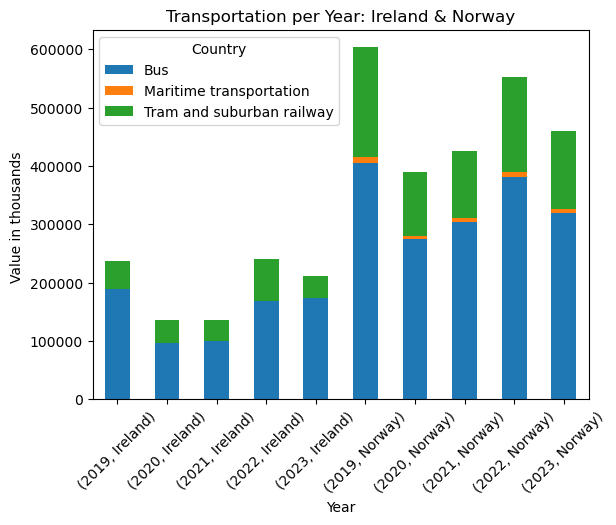

In [540]:
grouped = Transport_Year.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Value in thousands ')
plt.title('Transportation per Year: Ireland & Norway')
plt.legend(title='Country')
plt.xticks(rotation=45)


plt.show()

# Third Country: New Zealand

In [541]:
NZL

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bus,70.2,77.4,89.1,88.1,87.2,89.3,90.3,93.0,99.1,101.0,100.9,103.7,104.1,108.4,112.3,112.2,113.9,118.3,126.0
1,Train,12.2,12.4,12.5,13.4,14.3,16.4,16.9,18.4,19.5,19.6,21.1,22.2,21.4,23.1,26.1,29.6,32.7,33.7,35.7
2,Ferry,3.5,3.8,4.0,4.0,4.1,4.2,4.2,4.7,4.7,4.9,5.0,5.7,5.8,5.5,5.9,6.2,6.5,6.4,6.7


In [542]:
NZL_1= NZL.melt(var_name="Year",value_name="VALUE")
NZL_1.head()

,Year,VALUE
0,Unnamed: 0,Bus
1,Unnamed: 0,Train
2,Unnamed: 0,Ferry
3,2000,70.2
4,2000,12.2


In [543]:
sequence = ['Bus', 'Tram and suburban railway', 'Maritime transportation']
seq_length = len(sequence)

NZL_1['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NZL_1))]

NZL_1.head()

,Year,VALUE,Mode of Transport
0,Unnamed: 0,Bus,Bus
1,Unnamed: 0,Train,Tram and suburban railway
2,Unnamed: 0,Ferry,Maritime transportation
3,2000,70.2,Bus
4,2000,12.2,Tram and suburban railway


In [544]:
NZL_1 = NZL_1.drop([0, 1, 2])

In [545]:
NZL_1['VALUE'] = pd.to_numeric(NZL_1['VALUE'], errors='coerce')

In [546]:
NZL_1['VALUE'] = (NZL_1['VALUE'] * 1000).round(2)
NZL_1.head()

,Year,VALUE,Mode of Transport
3,2000,70200.0,Bus
4,2000,12200.0,Tram and suburban railway
5,2000,3500.0,Maritime transportation
6,2001,77400.0,Bus
7,2001,12400.0,Tram and suburban railway


In [547]:
NZL_1['Year'] = NZL_1['Year'].astype(int)
NZL_1['VALUE'] = NZL_1['VALUE'].astype(float)

# Linear projection for each mode of transport

Due to the lack of current data, a 5-year projection will be made in order to have data up to 2023

In [548]:
newzeland = pd.DataFrame(columns=['Year', 'Mode of Transport', 'VALUE'])

for mode in NZL_1['Mode of Transport'].unique():
    mode_data = NZL_1[NZL_1['Mode of Transport'] == mode]
    x = mode_data['Year'].values.reshape(-1, 1)
    y = mode_data['VALUE'].values.reshape(-1, 1)

#Perform linear projection for the next 5 years
    next_years = np.arange(NZL_1['Year'].max() + 1, NZL_1['Year'].max() + 6).reshape(-1, 1)
    coef = np.polyfit(x.ravel(), y.ravel(), 1)
    projection = np.polyval(coef, next_years)

# Append the projection to the DataFrame
    newzeland = newzeland.append(pd.DataFrame({'Year': next_years.ravel(), 'Mode of Transport': [mode] * 5, 'VALUE': projection.ravel()}), ignore_index=True)

newzeland

,Year,Mode of Transport,VALUE
0,2019,Bus,123992.982456
1,2020,Bus,126473.859649
2,2021,Bus,128954.736842
3,2022,Bus,131435.614035
4,2023,Bus,133916.491228
5,2019,Tram and suburban railway,33905.263158
6,2020,Tram and suburban railway,35184.210526
7,2021,Tram and suburban railway,36463.157895
8,2022,Tram and suburban railway,37742.105263
9,2023,Tram and suburban railway,39021.052632


In [549]:
newzeland['VALUE'] = newzeland['VALUE'].round(2)

In [550]:
newzeland['Country'] = 'Newzeland'
newzeland.head()

,Year,Mode of Transport,VALUE,Country
0,2019,Bus,123992.98,Newzeland
1,2020,Bus,126473.86,Newzeland
2,2021,Bus,128954.74,Newzeland
3,2022,Bus,131435.61,Newzeland
4,2023,Bus,133916.49,Newzeland


In [551]:
Transport_1 = pd.concat([Transport_Year, newzeland], ignore_index=True)
Transport_1.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


In [552]:
Transport_1['Year'] = Transport_1['Year'].astype(int)
Transport_1['VALUE'] = Transport_1['VALUE'].astype(float)

# Evolution per year for each mode of transport: Ireland-Norway-New Zealand

In [553]:
fig = px.line(Transport_1, x='Year', y='VALUE', color='Country', facet_col='Mode of Transport',
              title='Evolution per year for each mode of transport')

fig.update_yaxes(title_text='Value in thousands ')

# Frequency of Use

According to the population from 2019 to 2023, it is estimated how many times per person have used each of the transports 

In [554]:
Population = pd.concat([PI,PN, PNZ], ignore_index=True)
Population.head()

,Year,Population,Country
0,2019,4958.5,Ireland
1,2020,5029.9,Ireland
2,2021,5074.7,Ireland
3,2022,5184.0,Ireland
4,2023,5281.6,Ireland


In [555]:
merged_Population = pd.merge(Transport_1, Population, on=['Year', 'Country'])
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population
0,2019,Ireland,Bus,188554.0,4958.5
1,2019,Ireland,Tram and suburban railway,48345.0,4958.5
2,2020,Ireland,Bus,97520.0,5029.9
3,2020,Ireland,Tram and suburban railway,37954.0,5029.9
4,2021,Ireland,Bus,99409.0,5074.7


In [556]:
merged_Population['Frequency_of_Use'] = merged_Population['VALUE'] / merged_Population['Population'] 
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use
0,2019,Ireland,Bus,188554.0,4958.5,38.026419
1,2019,Ireland,Tram and suburban railway,48345.0,4958.5,9.749924
2,2020,Ireland,Bus,97520.0,5029.9,19.388059
3,2020,Ireland,Tram and suburban railway,37954.0,5029.9,7.545677
4,2021,Ireland,Bus,99409.0,5074.7,19.589138


In [557]:
merged_Population['Frequency_of_Use'] = merged_Population['Frequency_of_Use'].astype(float)
merged_Population['VALUE'] = merged_Population['VALUE'].astype(float)
merged_Population['Year'] = merged_Population['Year'].astype(float)

# Model Building

Splitting data into a training set and a test set.

In [558]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [559]:
bus= merged_Population[merged_Population['Mode of Transport'] == 'Bus']
bus

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use
0,2019.0,Ireland,Bus,188554.00,4958.500,38.026419
2,2020.0,Ireland,Bus,97520.00,5029.900,19.388059
4,2021.0,Ireland,Bus,99409.00,5074.700,19.589138
6,2022.0,Ireland,Bus,167990.00,5184.000,32.405478
8,2023.0,Ireland,Bus,174485.00,5281.600,33.036390
10,2019.0,Norway,Bus,405152.00,5328.212,76.039016
13,2020.0,Norway,Bus,274325.00,5367.580,51.107762
16,2021.0,Norway,Bus,304718.00,5391.369,56.519596
19,2022.0,Norway,Bus,381568.00,5425.270,70.331615
22,2023.0,Norway,Bus,319133.00,5488.984,58.140632


# Dummy Variable Creation

In [560]:
# Creating a dummy variable for the variable 'Country' and dropping the first one.
con = pd.get_dummies(merged_Population['Country'],prefix='Country',drop_first=True)
#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,con],axis=1)

# Creating a dummy variable for the variable 'Mode of Transport' and dropping the first one.
moft = pd.get_dummies(merged_Population['Mode of Transport'],prefix='Mode of Transport',drop_first=True)
#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,moft],axis=1)

In [561]:
merged_Population

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway
0,2019.0,Ireland,Bus,188554.00,4958.500,38.026419,0,0,0,0
1,2019.0,Ireland,Tram and suburban railway,48345.00,4958.500,9.749924,0,0,0,1
2,2020.0,Ireland,Bus,97520.00,5029.900,19.388059,0,0,0,0
3,2020.0,Ireland,Tram and suburban railway,37954.00,5029.900,7.545677,0,0,0,1
4,2021.0,Ireland,Bus,99409.00,5074.700,19.589138,0,0,0,0
5,2021.0,Ireland,Tram and suburban railway,36551.00,5074.700,7.202593,0,0,0,1
6,2022.0,Ireland,Bus,167990.00,5184.000,32.405478,0,0,0,0
7,2022.0,Ireland,Tram and suburban railway,73401.00,5184.000,14.159144,0,0,0,1
8,2023.0,Ireland,Bus,174485.00,5281.600,33.036390,0,0,0,0
9,2023.0,Ireland,Tram and suburban railway,37018.00,5281.600,7.008861,0,0,0,1


# Checking outliers at 25%,50%,75%,90%,95% and 99%

In [562]:
merged_Population.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Year,VALUE,Population,Frequency_of_Use,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway
count,40.00000,40.000000,40.000000,40.000000,40.00000,40.00000,40.000000,40.00000
mean,2021.00000,106386.718250,5228.208625,20.162030,0.37500,0.37500,0.250000,0.37500
std,1.43223,107197.298848,158.410113,19.934770,0.49029,0.49029,0.438529,0.49029
min,2019.00000,5840.000000,4958.500000,1.088014,0.00000,0.00000,0.000000,0.00000
25%,2020.00000,27771.945000,5103.700000,5.484760,0.00000,0.00000,0.000000,0.00000
50%,2021.00000,85460.500000,5226.600000,16.773601,0.00000,0.00000,0.000000,0.00000
75%,2022.00000,141722.750000,5367.580000,26.583702,1.00000,1.00000,0.250000,1.00000
90%,2023.00000,277364.300000,5425.270000,51.648945,1.00000,1.00000,1.000000,1.00000
95%,2023.00000,322254.750000,5488.984000,58.750181,1.00000,1.00000,1.000000,1.00000
99%,2023.00000,395954.240000,5488.984000,73.813130,1.00000,1.00000,1.000000,1.00000


In [563]:
# Checking the percentage of missing values
round(100*(merged_Population.isnull().sum()/len(merged_Population.index)), 2)

Year                                           0.0
Country                                        0.0
Mode of Transport                              0.0
VALUE                                          0.0
Population                                     0.0
Frequency_of_Use                               0.0
Country_Newzeland                              0.0
Country_Norway                                 0.0
Mode of Transport_Maritime transportation      0.0
Mode of Transport_Tram and suburban railway    0.0
dtype: float64

# Feature Standardisation

Checking for Outliers

In [564]:
merged_Population.dtypes

Year                                           float64
Country                                         object
Mode of Transport                               object
VALUE                                          float64
Population                                     float64
Frequency_of_Use                               float64
Country_Newzeland                                uint8
Country_Norway                                   uint8
Mode of Transport_Maritime transportation        uint8
Mode of Transport_Tram and suburban railway      uint8
dtype: object

Normalising continuous features

In [565]:
df = merged_Population[['Frequency_of_Use','Population','VALUE']]

In [566]:
normalized_df=(df-df.mean())/df.std()

In [567]:
merged_Population = merged_Population.drop(['Frequency_of_Use','Population','VALUE'], 1)

In [568]:
merged_Population = pd.concat([merged_Population,normalized_df],axis=1)

In [606]:
merged_Population .head()

,Year,Country,Mode of Transport,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway,Frequency_of_Use,Population,VALUE
0,2019.0,Ireland,Bus,0,0,0,0,0.896142,-1.702597,0.766505
1,2019.0,Ireland,Tram and suburban railway,0,0,0,1,-0.522309,-1.702597,-0.541448
2,2020.0,Ireland,Bus,0,0,0,0,-0.038825,-1.251868,-0.082714
3,2020.0,Ireland,Tram and suburban railway,0,0,0,1,-0.632882,-1.251868,-0.638381
4,2021.0,Ireland,Bus,0,0,0,0,-0.028738,-0.969058,-0.065092


# Splitting Data into Training and Test Sets

In [587]:
# Putting feature variable to X
X = merged_Population.drop(['Year','Country'],axis=1)

# Putting response variable to y
y =merged_Population['Year']

In [588]:
X.shape, y.shape

((40, 8), (40,))

In [589]:
y.head()

0    2019.0
1    2019.0
2    2020.0
3    2020.0
4    2021.0
Name: Year, dtype: float64

In [590]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [591]:
X_train.shape

(28, 8)

# Running the First 

In [592]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [593]:
import statsmodels.api as sm

In [597]:
X_train

,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway,Frequency_of_Use,Population,VALUE
22,0,1,0,0,1.905144,1.646204,1.984624
18,0,1,0,1,0.058200,1.029987,0.079939
37,1,0,0,0,0.263506,0.258767,0.256814
5,0,0,0,1,-0.650092,-0.969058,-0.651469
13,0,1,0,0,1.552350,0.879814,1.566628
1,0,0,0,1,-0.522309,-1.702597,-0.541448
26,1,0,0,1,-0.673965,-1.185585,-0.676150
12,0,1,0,1,0.763076,0.631294,0.765806
29,1,0,0,1,-0.665579,-0.785989,-0.664219
9,0,0,0,1,-0.659810,0.337045,-0.647113


In [608]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Year   No. Observations:                   28
Model:                            GLM   Df Residuals:                       20
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 03 Jan 2024   Deviance:                   4.9383e+06
Time:                        10:56:31   Pearson chi2:                 5.14e+23
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        1.366e+19    3.9e+07    3.5e+11      0.000    1.37e+19    1.37e+19
Country_Newzeland                           -3.317e+15   3.65e+07  -9.08e+07      0.000   -3.32e+15   -3.32e+15
Country_Norway                              -2.706e+16   7.56e+07  -3.58e+08      0.000   -2.71e+16   -2.71e+16
Mode of Transport_Maritime transportation   -1.218e+16   9.49e+07  -1.28e+08      0.000   -1.22e+16   -1.22e+16
Mode of Transport_Tram and suburban railway -6.587e+15   5.99e+07   -1.1e+08      0.000   -6.59e+15   -6.59e+15
Frequency_of_Use                            -7.986e+16   8.67e+08  -9.21e+07      0.000   -7.99e+16   -7.99e+16
Population                                   1.538e+16   3.03e+07   5.08e+08      0.000    1.54e+16    1.54e+16
VALUE                                        7.558e+16   8.54e+08   8.85e+07      0.000    7.56e+16    7.56e+16
===============================================================================================================
"""

# Correlation Matrix

In [609]:
import seaborn as sns
%matplotlib inline

<Figure size 2000x1000 with 0 Axes>

<Axes: >

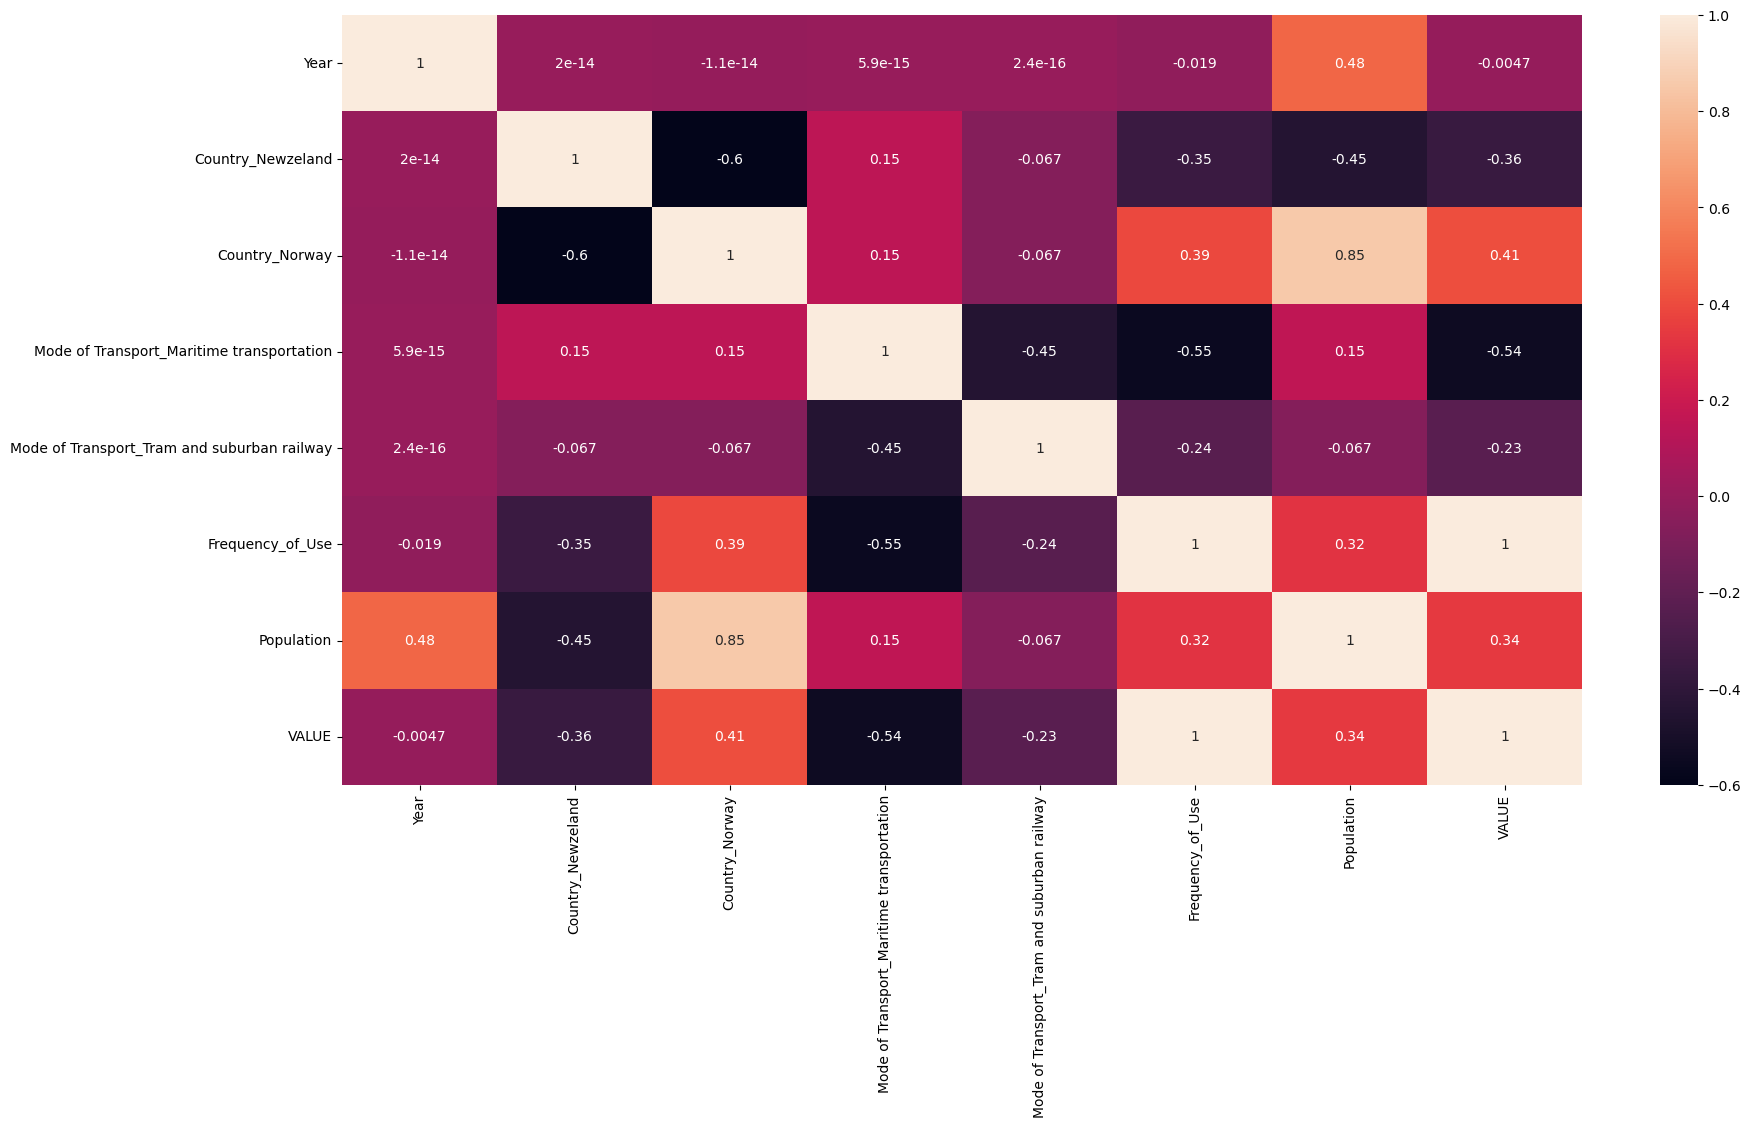

In [610]:
plt.figure(figsize = (20,10))        
sns.heatmap(merged_Population.corr(),annot = True)

# Feature Selection Using RFE

In [614]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

ValueError: could not convert string to float: 'Bus'

# Training Model

In [588]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

In [587]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

NameError: name 'col' is not defined

# Making Predictions

Text(0, 0.5, 'Value in thousands ')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '2023'),
  Text(5, 0, '2019'),
  Text(6, 0, '2020'),
  Text(7, 0, '2021'),
  Text(8, 0, '2022'),
  Text(9, 0, '2023')])

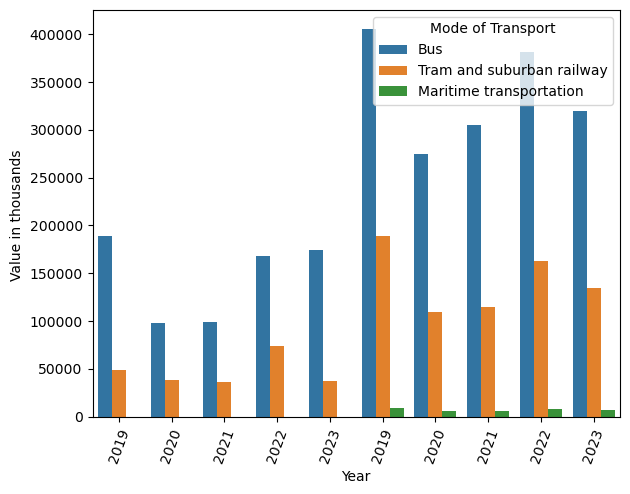

In [535]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Transport_Year)
plt.ylabel('Value in thousands ')

plt.tight_layout()

plt.xticks(rotation=70)

# Approaches using the GridSearchCV method.

## Interactive visualization of geographic data for frequency of use

In [403]:
# Country codes
def Code(row):
    if row['Country'] == 'Ireland':
        return 'IRL'
    if row['Country'] == 'Norway':
        return 'NOR'
    if row['Country'] == 'Newzeland':
        return 'NZL'

merged_Population['Code'] = merged_Population.apply(Code, axis=1)
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use,Code
0,2019.0,Ireland,Bus,188554.0,4958.5,38.026419,IRL
1,2019.0,Ireland,Tram and suburban railway,48345.0,4958.5,9.749924,IRL
2,2020.0,Ireland,Bus,97520.0,5029.9,19.388059,IRL
3,2020.0,Ireland,Tram and suburban railway,37954.0,5029.9,7.545677,IRL
4,2021.0,Ireland,Bus,99409.0,5074.7,19.589138,IRL


# Bus

In [405]:
bus= merged_Population[merged_Population['Mode of Transport'] == 'Bus']

In [423]:
fig = px.choropleth(bus, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"natural earth2"})
)

# TRAM

In [407]:
tram= merged_Population[merged_Population['Mode of Transport'] == 'Tram and suburban railway']

In [408]:
fig = px.choropleth(tram, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"cylindrical stereographic"})
)

# Maritime_transportation

In [409]:
Maritime_transportation= merged_Population[merged_Population['Mode of Transport'] == 'Maritime transportation']

In [410]:
fig = px.choropleth(Maritime_transportation, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"guyou"})
)

# Sentiment analysis

The process of analyzing digital text to determine whether the emotional tone of the message is positive, negative or neutral in this case the first sentimental analysis is to see what people are saying about 'LUAS' one of the most important public transport in Ireland.  

In [630]:
!pip install praw
!pip install python-dotenv

**Import All Required Packages**

In [631]:
import os

In [667]:
import re
import string
from string import punctuation
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime as dt

import praw
from dotenv import load_dotenv
from os import getenv
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [633]:
from dotenv import load_dotenv

# Library that has a lot of operating system functions
from os import getenv

In [634]:
load_dotenv()

True

In [646]:
APP_NAME = os.getenv('APP_NAME')
APP_ID = os.getenv('APP_ID')
APP_SECRET = os.getenv('APP_SECRET')
USERNAME = os.getenv('USERNAME')
PASSWORD= os.getenv('PASSWORD')

In [647]:
# Check that the variables all loaded
if APP_NAME is None or APP_ID is None or APP_SECRET is None or USERNAME is None or PASSWORD is None:
    print("ERROR: Some credentials not loaded!")
else:
    print("Credentials loaded")

Credentials loaded


In [648]:
reddit = praw.Reddit(client_id=getenv("APP_ID"),
    client_secret=getenv("APP_SECRET"),
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", 
)

In [649]:
print(reddit.read_only)

True


In [650]:
subreddit = reddit.subreddit("Python")

Set to store headlines

In [651]:
headlines = set()

# Labeling our Data

In [652]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [695]:
# Collect post titles
for submission in reddit.subreddit('ireland').search('LUAS'):
    headlines.add(submission.title)
    print(submission.title)

# Apply sentiment analysis to the titles
sia= SIA()
result = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headlines'] = line
    result.append(pol_score)

print(result[:3])

I worked as Luas Security for 4 Years AMA
Luas Inspectors gone mad with power.
Never mind, I just remembered the LUAS is free.
Scrotes on the Luas
Men harassing women at luas stop in Dublin
Have you seen an act of kindness on the Luas?
Teenagers in court over ‘pile in’ attack on Indian student on Luas
Luas fined me for not paying a €0 fare
Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
They set the Luas Ablaze
Close call on the Luas?
Luas never disappoints...
Red Cow Luas Stop today
Woman 'kicked and abused' by group of teens on Luas
Respect to the Luas Driver
Horses are returning to the LUAS, nature is healing, we are the virus
Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Blackhorse Luas Stop
Man stands infront of moving LUAS.
Sandyford Luas - Luas stop security
Luas Red line...use enough and see yourself become the villain.
Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Found thi

In [696]:
# Convert the results into a DataFrame
df = pd.DataFrame.from_records(result)
df.head()

,neg,neu,pos,compound,headlines
0,0.000,1.000,0.000,0.0000,luas tickets
1,0.000,1.000,0.000,0.0000,I am going to carry out a scientific project r...
2,0.000,0.750,0.250,0.4588,Have you seen an act of kindness on the Luas?
3,0.195,0.531,0.274,0.2263,Thrilling Garda action at Beechwood Luas stop ...
4,0.000,1.000,0.000,0.0000,Close call on the Luas?


In [697]:
# convert label to a numerical variable

With the labels and the value given to the words it is possible to perform the analysis to see if the words of the comments being analyzed are positive, negative or neutral. 

In [698]:
df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1
df.head()

,neg,neu,pos,compound,headlines,label
0,0.000,1.000,0.000,0.0000,luas tickets,0
1,0.000,1.000,0.000,0.0000,I am going to carry out a scientific project r...,0
2,0.000,0.750,0.250,0.4588,Have you seen an act of kindness on the Luas?,1
3,0.195,0.531,0.274,0.2263,Thrilling Garda action at Beechwood Luas stop ...,1
4,0.000,1.000,0.000,0.0000,Close call on the Luas?,0


# CASE STUDY - Classification
# Multinomial and Bernoulli Naive Bayes

In [699]:
numpy_array = df.values
X = numpy_array[:,-2]
Y = numpy_array[:,-1]
Y = Y.astype('int')
print("X")
print(X)
print("Y")
print(Y)

X
['luas tickets'
 'I am going to carry out a scientific project regarding Luas Fare’s'
 'Have you seen an act of kindness on the Luas?'
 'Thrilling Garda action at Beechwood Luas stop earlier'
 'Close call on the Luas?' 'Seen at Charlemont luas stop'
 'Luas Inspectors gone mad with power.' 'SocDems backing the Luas drivers'
 'Absolutely no crowd control on the luas.'
 "What's the deal with 90 minute travel and luas tagging?"
 "Woman's hair is set on fire by teenage gang amid 'daily reign of terror' on Luas Red Line"
 "Woman 'kicked and abused' by group of teens on Luas"
 'Saw this watermelon on the Luas.'
 "'FingLUAS': Plans to extend Luas to Finglas revealed"
 "'Bitter blow' as route announcement for Cork Luas delayed again"
 "Busker singing you've got a friend to an autistic child on the luas ♥"
 'LUAS inspectors'
 'Luas drivers threaten ballot on industrial action over warm sandwiches'
 'How to Drive a Luas!'
 'Anti-Corruption garda returns medal after being accused of using Luas t

Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words. 

This is called **vectorization of words**. We have the class ```CountVectorizer()``` in scikit learn to vectorize the words. Let us first see it in action before explaining it further.


In [700]:
# create an object of CountVectorizer() class 
vec = CountVectorizer( )

In [701]:
vec.fit(X)
vec.vocabulary_

CountVectorizer()

{'luas': 245,
 'tickets': 414,
 'am': 25,
 'going': 180,
 'to': 417,
 'carry': 80,
 'out': 298,
 'scientific': 350,
 'project': 318,
 'regarding': 328,
 'fare': 153,
 'have': 193,
 'you': 470,
 'seen': 355,
 'an': 28,
 'act': 14,
 'of': 288,
 'kindness': 229,
 'on': 293,
 'the': 405,
 'thrilling': 413,
 'garda': 174,
 'action': 15,
 'at': 40,
 'beechwood': 47,
 'stop': 385,
 'earlier': 140,
 'close': 94,
 'call': 77,
 'charlemont': 86,
 'inspectors': 216,
 'gone': 182,
 'mad': 248,
 'with': 459,
 'power': 315,
 'socdems': 372,
 'backing': 43,
 'drivers': 132,
 'absolutely': 10,
 'no': 278,
 'crowd': 110,
 'control': 100,
 'what': 452,
 'deal': 119,
 '90': 5,
 'minute': 262,
 'travel': 432,
 'and': 29,
 'tagging': 395,
 'woman': 460,
 'hair': 189,
 'is': 221,
 'set': 357,
 'fire': 162,
 'by': 76,
 'teenage': 397,
 'gang': 173,
 'amid': 27,
 'daily': 115,
 'reign': 329,
 'terror': 401,
 'red': 326,
 'line': 240,
 'kicked': 228,
 'abused': 12,
 'group': 187,
 'teens': 399,
 'saw': 347,
 '

```Countvectorizer()``` has converted the documents into a set of unique words alphabetically sorted and indexed.


**Stop Words**

We can see a few trivial words such as  'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called 'stop words'. So we would like to get rid of them. 

We can remove them by passing a parameter stop_words='english' while instantiating ```Countvectorizer()``` as follows: 

In [702]:
# removing the stop words
vec = CountVectorizer(stop_words='english' )
vec.fit(X)
vec.vocabulary_

CountVectorizer(stop_words='english')

{'luas': 197,
 'tickets': 339,
 'going': 147,
 'carry': 59,
 'scientific': 285,
 'project': 253,
 'regarding': 263,
 'fare': 127,
 'seen': 289,
 'act': 13,
 'kindness': 182,
 'thrilling': 338,
 'garda': 142,
 'action': 14,
 'beechwood': 34,
 'stop': 317,
 'earlier': 116,
 'close': 73,
 'charlemont': 65,
 'inspectors': 173,
 'gone': 149,
 'mad': 200,
 'power': 250,
 'socdems': 305,
 'backing': 31,
 'drivers': 110,
 'absolutely': 9,
 'crowd': 89,
 'control': 79,
 'deal': 98,
 '90': 5,
 'minute': 213,
 'travel': 356,
 'tagging': 327,
 'woman': 374,
 'hair': 155,
 'set': 291,
 'teenage': 329,
 'gang': 141,
 'amid': 21,
 'daily': 94,
 'reign': 264,
 'terror': 333,
 'red': 261,
 'line': 192,
 'kicked': 181,
 'abused': 11,
 'group': 154,
 'teens': 331,
 'saw': 282,
 'watermelon': 371,
 'fingluas': 134,
 'plans': 248,
 'extend': 124,
 'finglas': 133,
 'revealed': 273,
 'bitter': 36,
 'blow': 45,
 'route': 276,
 'announcement': 22,
 'cork': 80,
 'delayed': 99,
 'busker': 55,
 'singing': 299,
 '

Another way of printing the 'vocabulary':

In [703]:
# printing feature names
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

So our final dictionary is made of 12 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features. 

Every document will be converted into a *feature vector* representing presence of these words in that document. Let's convert each of our training documents in to a feature vector.

In [704]:
# another way of representing the features
X_transformed=vec.transform(X)
X_transformed

<100x384 sparse matrix of type '<class 'numpy.int64'>'
	with 581 stored elements in Compressed Sparse Row format>

You can see X_tranformed is a 5 x 12 sparse matrix. It has 5 rows for each of our 5 documents and 12 columns each 
for one word of the dictionary which we just created. Let us print X_transformed.

In [705]:
print(X_transformed)

  (0, 197)	1
  (0, 339)	1
  (1, 59)	1
  (1, 127)	1
  (1, 147)	1
  (1, 197)	1
  (1, 253)	1
  (1, 263)	1
  (1, 285)	1
  (2, 13)	1
  (2, 182)	1
  (2, 197)	1
  (2, 289)	1
  (3, 14)	1
  (3, 34)	1
  (3, 116)	1
  (3, 142)	1
  (3, 197)	1
  (3, 317)	1
  (3, 338)	1
  (4, 73)	1
  (4, 197)	1
  (5, 65)	1
  (5, 197)	1
  (5, 289)	1
  :	:
  (95, 311)	1
  (95, 341)	1
  (96, 110)	1
  (96, 197)	1
  (97, 49)	1
  (97, 84)	1
  (97, 136)	1
  (97, 192)	1
  (97, 197)	1
  (97, 261)	1
  (98, 1)	1
  (98, 85)	1
  (98, 129)	1
  (98, 146)	1
  (98, 181)	1
  (98, 184)	1
  (98, 197)	1
  (98, 294)	1
  (98, 343)	1
  (98, 374)	1
  (99, 88)	1
  (99, 197)	1
  (99, 261)	1
  (99, 317)	1
  (99, 342)	1


This representation can be understood as follows:

Consider first 4 rows of the output: (0,2), (0,5), (0,7) and (0,11). It says that the first document (index 0) has 
7th , 2nd , 5th and 11th 'word' present in the document, and that they appear only
once in the document- indicated by the right hand column entry. 

Similarly, consider the entry (4,4) (third from bottom). It says that the fifth document has the fifth word present twice. Indeed, the 5th word('good') appears twice in the 5th document. 

In real problems, you often work with large documents and vocabularies, and each document contains only a few words in the vocabulary. So it would be a waste of space to store the vocabulary in a typical dataframe, since most entries would be zero. Also, matrix products, additions etc. are much faster with sparse matrices. That's why we use sparse matrices to store the data.


Let us convert this sparse matrix into a more easily interpretable array:

In [706]:
# converting transformed matrix back to an array
# note the high number of zeros
X=X_transformed.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

To make better sense of the dataset, let us examine the vocabulary and document-term matrix together in a pandas dataframe. The way to convert a matrix into a dataframe is ```pd.DataFrame(matrix, columns=columns)```.

In [708]:
# converting matrix to dataframe
pd.DataFrame(X, columns=vec.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

A corpus of documents can thus be represented by a matrix with one row per document and one column per
token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the "Bag of Words" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

#### So, the 4 steps for vectorization are as follows

- Import
- Instantiate
- Fit 
- Transform

Let us summarise all we have done till now:

- ```vect.fit(train)``` learns the vocabulary of the training data
- ```vect.transform(train)``` uses the fitted vocabulary to build a document-term matrix from the training data
- ```vect.transform(test)``` uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [709]:
test_docs = pd.read_csv('example_test.csv') 
#text in column 1, classifier in column 2.
test_docs

FileNotFoundError: [Errno 2] No such file or directory: 'example_test.csv'

In [ ]:
# convert label to a numerical variable
test_docs['Class'] = test_docs.Class.map({'cinema':0, 'education':1})
test_docs

In [ ]:
test_numpy_array = test_docs.values
X_test = test_numpy_array[:,0]
Y_test = test_numpy_array[:,1]
Y_test = Y_test.astype('int')
print("X_test")
print(X_test)
print("Y_test")
print(Y_test)

In [ ]:
X_test_transformed=vec.transform(X_test)
X_test_transformed

In [ ]:
X_test=X_test_transformed.toarray()
X_test

# Multinomial Naive Bayes

In [ ]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X,Y)

# predicting probabilities of test data
mnb.predict_proba(X_test)

In [ ]:
proba=mnb.predict_proba(X_test)
print("probability of test document belonging to class CINEMA" , proba[:,0])
print("probability of test document belonging to class EDUCATION" , proba[:,1])

In [ ]:
pd.DataFrame(proba, columns=['Cinema','Education'])

# Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X,Y)

# predicting probability of test data
bnb.predict_proba(X_test)
proba_bnb=bnb.predict_proba(X_test)

In [ ]:
pd.DataFrame(proba_bnb, columns=['Cinema','Education'])

# Dataset Info and Stadistics

In [ ]:
df2= df[['headlines','label']]
df2.to_csv('reddit_headline_labels.cvs', mode='a',encoding='utf-8',index=False)

In [20]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1]['headlines'])[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1]['headlines'])[:5])

Positive headlines:

['I thought the luas was free!', "Busker singing you've got a friend to an autistic child on the luas ♥", 'Never mind, I just remembered the LUAS is free.', 'Anti-Corruption garda returns medal after being accused of using Luas to complete Dublin marathon - Independent.ie', 'Your friendly neighborhood Mace @ Balally Luas.']

Negative headlines:

["Do you feel safe on the luas and what is the worst thing you've seen happen on it?", "Woman's hair is set on fire by teenage gang amid 'daily reign of terror' on Luas Red Line", 'Vandals Smear Luas Signage', 'Men harassing women at luas stop in Dublin', 'Luas driver just stopped the tram to tell the knackers to stop blaring their speakers']


Number of headlines evaluated and whether positive or negative 

In [21]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)

 0    46
-1    34
 1    20
Name: label, dtype: int64
 0    46.0
-1    34.0
 1    20.0
Name: label, dtype: float64


# Visualization of results 

<Axes: ylabel='label'>

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

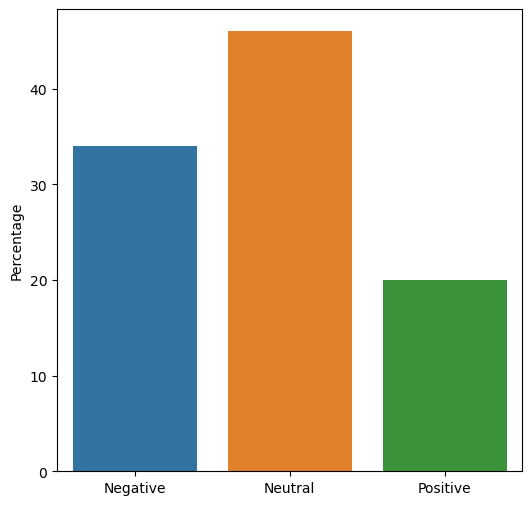

In [22]:
#Bar Graph. In order to visualize the difference of positive, negative and neutral comments in the analysis and to see that the predominant one was the negative one. 
fig,ax=plt.subplots(figsize=(6,6))

counts=df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

<Figure size 600x600 with 0 Axes>

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Sentiment Analysis')

Text(0, 0.5, '')

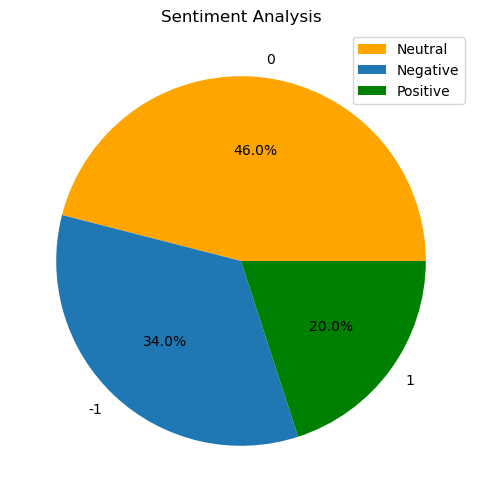

In [23]:
#Pie chart with normalized percentage of values
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'tab:blue', 'green'])
labels = {1: 'Positive', -1: 'Negative', 0: 'Neutral'}
plt.title('Sentiment Analysis')
plt.ylabel('')
plt.legend(labels=[labels[i] for i in counts.index], loc='upper right')
plt.show()

# Word frequency

Plot the word cloud for all the key words without prepocessing it 

In [24]:
all_headlines = ' '.join(headlines)

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud 

In [27]:
wordcloud = WordCloud(random_state=21, max_font_size=119).generate(all_headlines)

<Figure size 1900x1000 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

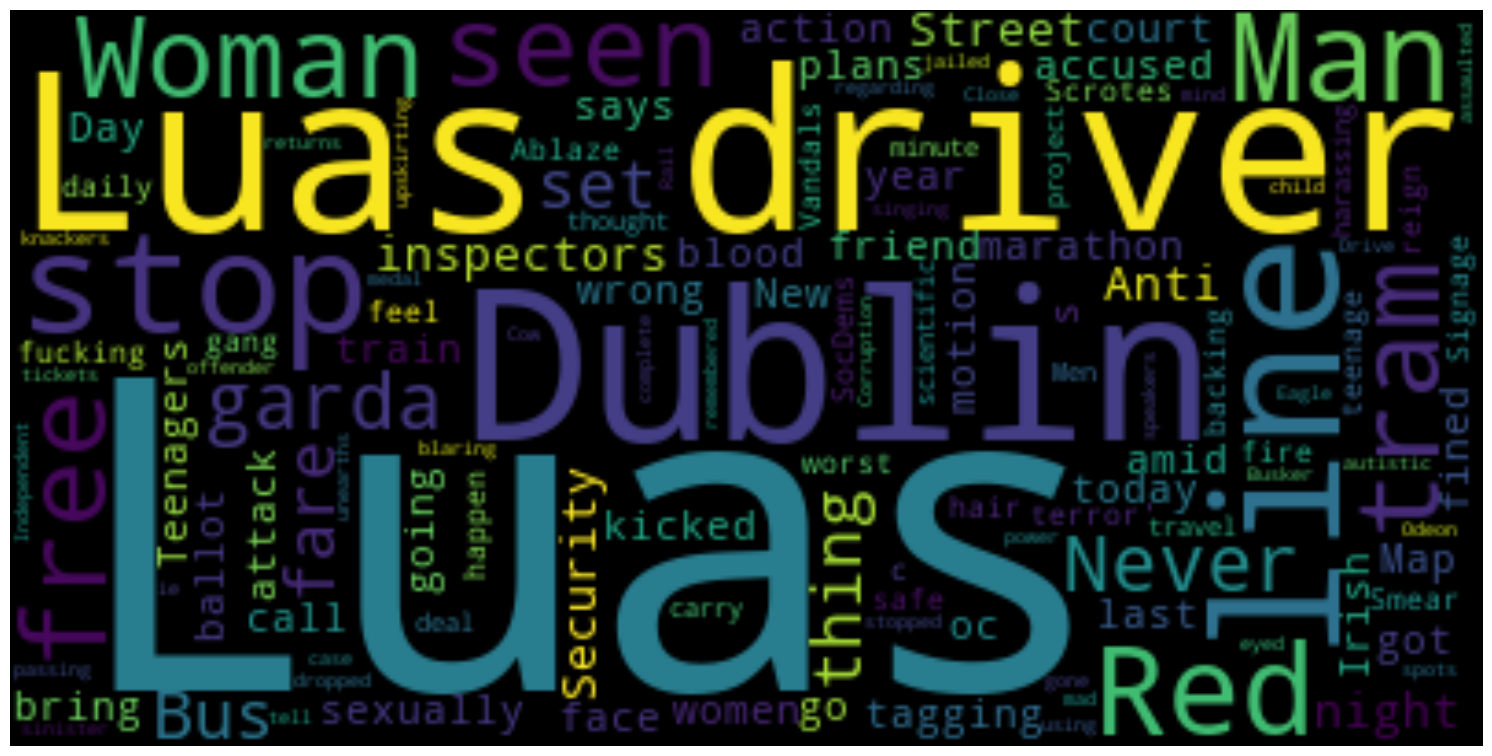

In [28]:
plt.figure(figsize=(19, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# NORWAY-Sentiment Analysis 

In [77]:
subreddit = reddit.subreddit("norway")
from datetime import datetime as dt

Lists to store post titles, comments, and timestamps

In [78]:
postTitles = []
postComments = []
commentTimes = []

In [79]:
for post in subreddit.search('T-bane', limit=10):
    post.comment_sort = 'best'  # Ordenar comentarios por 'best' para obtener los mejores comentarios primero
    post.comment_limit = None   # Sin límite en la cantidad de comentarios

    for comment in post.comments:
        if isinstance(comment, praw.models.MoreComments):
            continue  # Saltar comentarios adicionales no cargados completamente

        postTitles.append(post.title)
        postComments.append(comment.body)
        commentTimes.append(dt.fromtimestamp(comment.created_utc))

In [80]:
postsDict = {}
for post in subreddit.new(limit=10):
    postsDict[post.title] = []
    for comment in list(post.comments):
        postsDict[post.title].append({
            "comment":comment.body,
            "time": str(dt.fromtimestamp(comment.created_utc))
        })

In [81]:
import json

In [82]:
postsDict

{'Is Sana-Sol a drink?': [{'comment': "Have you tried Google?  \nIt's a multivitamin thingy, not for thirst",
   'time': '2024-01-01 12:26:24'},
  {'comment': 'If cerial is a soup.', 'time': '2024-01-01 12:28:12'},
  {'comment': 'I’m asking because my family started to argue about it. Personally i think it’s not a drink.',
   'time': '2024-01-01 12:28:57'}],
 '2 of my co-workers are having sex at our place of work. After hours, on weekends, Etc. Is this considered unprofessional behavior in Norway?': [{'comment': 'Yes, this is considered extremely unprofessional. Beyond unprofessional.',
   'time': '2024-01-01 12:21:33'},
  {'comment': 'Yes, extremely unprofessional.', 'time': '2024-01-01 12:34:53'},
  {'comment': '"I’m going to get right to the point. It has come to my attention that you and the cleaning woman have engaged in sexual intercourse on the desk in your office. Is that correct?"  \n"Who said that?"  \n" She did."  \n" Was that wrong? Should I have not done that? "',
   'tim

In [83]:
data = json.dumps(postsDict)

In [84]:
with open("reddit data NWDF.json", "w") as f:
    f.write(data)

17105

In [86]:
NWDF=pd.DataFrame({
    "Post Title":postTitles,
    "Comment": postComments,
    "Comment Time": commentTimes
})

In [87]:
NWDF.head()

,Post Title,Comment,Comment Time
0,Abou the T-bane,I find the T-bane door openers to be quite goo...,2023-01-16 16:36:05
1,Abou the T-bane,Former driver here: the button indicates that ...,2023-01-17 04:34:55
2,Abou the T-bane,I never understood this. The doors are program...,2023-01-16 14:36:41
3,Abou the T-bane,"Oh, people misunderstand this every day. I lik...",2023-01-16 19:12:25
4,Abou the T-bane,Just rip it open like a man.,2023-01-16 13:21:17


In [88]:
NWDF.to_csv('reddit_T-bane.cvs',index=False)

In [89]:
NWDF2= pd.read_csv('reddit_T-bane.cvs')

In [90]:
NWDF2.head()

,Post Title,Comment,Comment Time
0,Abou the T-bane,I find the T-bane door openers to be quite goo...,2023-01-16 16:36:05
1,Abou the T-bane,Former driver here: the button indicates that ...,2023-01-17 04:34:55
2,Abou the T-bane,I never understood this. The doors are program...,2023-01-16 14:36:41
3,Abou the T-bane,"Oh, people misunderstand this every day. I lik...",2023-01-16 19:12:25
4,Abou the T-bane,Just rip it open like a man.,2023-01-16 13:21:17


In [94]:
pip install pymongo

  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/c8/1a/1ba5578cc3acc8ef0dfd6eb9385f9c4b0fe3039665af93bcf062c34fcdb6/pymongo-4.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/f6/b4/0a9bee52c50f226a3cbfb54263d02bb421c7f2adc136520729c2c689c1e5/dnspython-2.4.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/472.7 kB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 450.6/472.7 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 472.7/472.7 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 300.4/300.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [95]:
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017")

In [96]:
db=client["Reddit"]#Databases
coll=db["Python"]#colletion/tables

In [98]:
for post in postsDict.keys():
    for comment in postsDict[post]:
        coll.insert_one({post:comment})

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 659315ef51c2ad6af13cb3bd, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

# Testing & Optimisation

There are many reasons to perform Testing and Optimization, but the main one is that test optimization reduces maintenance time, which could be a significant time investment in the future.

# Testing Strategy 

# Manual Unit Test

# Automated Unit Test

# Optimisation